*Eduardus Tjitrahardja | @edutjie | 2022*

# Ristek Datathon 2022: Preprocess

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk, string
from tqdm import tqdm

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams.update(
    {
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "white",
        "axes.facecolor": "#202434",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "grey",
        "figure.facecolor": "#202434",
        "figure.edgecolor": "#202434",
        "savefig.facecolor": "#202434",
        "savefig.edgecolor": "#202434",
    }
)

SEED = 10

## Loading Dataset

In [2]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
unlabeled_df = pd.read_csv('dataset/unlabeled.csv')

combined_df = pd.concat([train_df, test_df, unlabeled_df], ignore_index=True)

train_df.shape, test_df.shape, unlabeled_df.shape, combined_df.shape

((1518, 8), (1011, 7), (9936, 6), (12465, 8))

In [4]:
train_df.head()

,created_at,id,user_id,user_name,url,text,media,label
0,2020-02-23 04:06:39+00:00,1231430140824973313,133931409,r0b1 sur1a (黄玉春),https://twitter.com/R0b1Sur1a/status/123143014...,Akhirnya sampai juga setelah menerobos banjir....,ERbrKgFU4AAnADb.jpg,0
1,2020-01-05 01:46:46+00:00,1213637932411580417,253063316,Beradaptasi di Era Pandemi ☀️,https://twitter.com/MarikaRahman_/status/12136...,"Kemekes RI, IDI Banten, IBI Banten dan PPNI Ba...",ENe1HUVUEAANLFT.jpg,0
2,2020-01-18 06:22:09+00:00,1218418277946396673,64318803,rywyu,https://twitter.com/rywyu/status/1218418277946...,Dikarenakan cikini rada2 banjir tdi pagi hingg...,EOiw80RU0AcJ4CI.jpg,0
3,2020-02-22 23:38:00+00:00,1231362534717837313,17383917,ICALIZERS,https://twitter.com/icalizers/status/123136253...,#sperma TT dikala warga jakarta sedang prihati...,ERatrt9UYAAtLMI.jpg,0
4,2019-12-17 10:54:31+00:00,1206890412574568449,3102973556,AN,https://twitter.com/lokbin103/status/120689041...,"KUIS!\n\nJakarta banjir parah hari ini, pertan...",EL-8Z-vUcAIiIlV.jpg,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  1518 non-null   object
 1   id          1518 non-null   int64 
 2   user_id     1518 non-null   int64 
 3   user_name   1518 non-null   object
 4   url         1518 non-null   object
 5   text        1518 non-null   object
 6   media       1518 non-null   object
 7   label       1518 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 95.0+ KB


In [8]:
train_df.isnull().sum()

created_at    0
id            0
user_id       0
user_name     0
url           0
text          0
media         0
label         0
dtype: int64

In [10]:
test_df.isnull().sum()

created_at    0
id            0
user_id       0
user_name     0
url           0
text          0
media         0
dtype: int64

In [9]:
unlabeled_df.isnull().sum()

created_at    0
id            0
user_id       0
user_name     1
url           0
text          0
dtype: int64

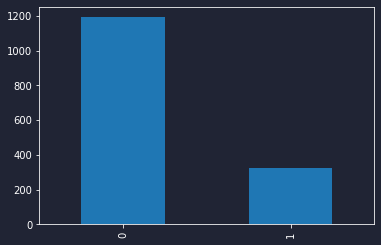

In [17]:
train_df.label.value_counts().plot(kind='bar')
plt.show()

In [4]:
train_df.label.value_counts()

0    1192
1     326
Name: label, dtype: int64

## Text Preprocessing

In [9]:
def text_precessor(text):
    # lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove numbers
    text = text.translate(str.maketrans('', '', string.digits))
    # remove whitespaces
    text = text.strip()
    
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    
    # remove stopwords
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    stop = stopword.remove(text)
    
    # tokenization
    tokens = nltk.tokenize.word_tokenize(stop)
    return ' '.join(tokens)

In [10]:
combined_df['text'] = combined_df['text'].apply(text_precessor)
combined_df.head()

,created_at,id,user_id,user_name,url,text,media,label
0,2020-02-23 04:06:39+00:00,1231430140824973313,133931409,r0b1 sur1a (黄玉春),https://twitter.com/R0b1Sur1a/status/123143014...,akhir juga terobos banjir httpstcotqeuevurh,ERbrKgFU4AAnADb.jpg,0.0
1,2020-01-05 01:46:46+00:00,1213637932411580417,253063316,Beradaptasi di Era Pandemi ☀️,https://twitter.com/MarikaRahman_/status/12136...,kemekes ri idi banten ibi banten ppni banten t...,ENe1HUVUEAANLFT.jpg,0.0
2,2020-01-18 06:22:09+00:00,1218418277946396673,64318803,rywyu,https://twitter.com/rywyu/status/1218418277946...,cikini rada banjir tdi pagi hingga gk tau apa ...,EOiw80RU0AcJ4CI.jpg,0.0
3,2020-02-22 23:38:00+00:00,1231362534717837313,17383917,ICALIZERS,https://twitter.com/icalizers/status/123136253...,sperma tt kala warga jakarta sedang prihatin b...,ERatrt9UYAAtLMI.jpg,0.0
4,2019-12-17 10:54:31+00:00,1206890412574568449,3102973556,AN,https://twitter.com/lokbin103/status/120689041...,kuis jakarta banjir parah hari tanya siapa yg ...,EL-8Z-vUcAIiIlV.jpg,0.0


In [11]:
# remove words that starts with http
combined_df['text'] = combined_df['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('http')]))
combined_df.head()

,created_at,id,user_id,user_name,url,text,media,label
0,2020-02-23 04:06:39+00:00,1231430140824973313,133931409,r0b1 sur1a (黄玉春),https://twitter.com/R0b1Sur1a/status/123143014...,akhir juga terobos banjir,ERbrKgFU4AAnADb.jpg,0.0
1,2020-01-05 01:46:46+00:00,1213637932411580417,253063316,Beradaptasi di Era Pandemi ☀️,https://twitter.com/MarikaRahman_/status/12136...,kemekes ri idi banten ibi banten ppni banten t...,ENe1HUVUEAANLFT.jpg,0.0
2,2020-01-18 06:22:09+00:00,1218418277946396673,64318803,rywyu,https://twitter.com/rywyu/status/1218418277946...,cikini rada banjir tdi pagi hingga gk tau apa ...,EOiw80RU0AcJ4CI.jpg,0.0
3,2020-02-22 23:38:00+00:00,1231362534717837313,17383917,ICALIZERS,https://twitter.com/icalizers/status/123136253...,sperma tt kala warga jakarta sedang prihatin b...,ERatrt9UYAAtLMI.jpg,0.0
4,2019-12-17 10:54:31+00:00,1206890412574568449,3102973556,AN,https://twitter.com/lokbin103/status/120689041...,kuis jakarta banjir parah hari tanya siapa yg ...,EL-8Z-vUcAIiIlV.jpg,0.0


In [30]:
combined_df.to_csv('dataset/processed_combined.csv', index=False)

In [3]:
combined_df = pd.read_csv('dataset/processed_combined.csv')

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12465 entries, 0 to 12464
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  12465 non-null  object 
 1   id          12465 non-null  int64  
 2   user_id     12465 non-null  int64  
 3   user_name   12464 non-null  object 
 4   url         12465 non-null  object 
 5   text        12465 non-null  object 
 6   media       2529 non-null   object 
 7   label       1518 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 779.2+ KB


In [6]:
combined_df['text'] = combined_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in ['yg', 'di']]))
combined_df.head()

,created_at,id,user_id,user_name,url,text,media,label
0,2020-02-23 04:06:39+00:00,1231430140824973313,133931409,r0b1 sur1a (黄玉春),https://twitter.com/R0b1Sur1a/status/123143014...,akhir juga terobos banjir,ERbrKgFU4AAnADb.jpg,0.0
1,2020-01-05 01:46:46+00:00,1213637932411580417,253063316,Beradaptasi di Era Pandemi ☀️,https://twitter.com/MarikaRahman_/status/12136...,kemekes ri idi banten ibi banten ppni banten t...,ENe1HUVUEAANLFT.jpg,0.0
2,2020-01-18 06:22:09+00:00,1218418277946396673,64318803,rywyu,https://twitter.com/rywyu/status/1218418277946...,cikini rada banjir tdi pagi hingga gk tau apa ...,EOiw80RU0AcJ4CI.jpg,0.0
3,2020-02-22 23:38:00+00:00,1231362534717837313,17383917,ICALIZERS,https://twitter.com/icalizers/status/123136253...,sperma tt kala warga jakarta sedang prihatin b...,ERatrt9UYAAtLMI.jpg,0.0
4,2019-12-17 10:54:31+00:00,1206890412574568449,3102973556,AN,https://twitter.com/lokbin103/status/120689041...,kuis jakarta banjir parah hari tanya siapa sal...,EL-8Z-vUcAIiIlV.jpg,0.0


In [4]:
def create_vocab(message, show_graph=False):
    corpus = []
    for text in tqdm(combined_df["text"].values, desc="Tokenizaing"):
        tokens = nltk.tokenize.word_tokenize(text)
        corpus.extend(tokens)

    tqdm.write(f"The number of all words: {len(corpus)}")

    counts = nltk.FreqDist(corpus)
    tqdm.write(f"The number of unique words: {len(counts)}")

    bow = sorted(counts, key=counts.get, reverse=True)
    tqdm.write(f"Top 40 frequent words: {bow[:40]}")

    vocab = {word: ii for ii, word in enumerate(counts, 1)}

    if show_graph:
        from wordcloud import WordCloud, STOPWORDS

        # Generate Word Cloud image
        text = " ".join(corpus)

        wordcloud = WordCloud(
            max_font_size=50,
            max_words=100,
            background_color="white",
            collocations=False,
        ).generate(text)
        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

        # Show most frequent words in a bar graph
        most = counts.most_common()[:80]
        x, y = [], []
        for word, count in most:
            x.append(word)
            y.append(count)
        plt.figure(figsize=(12, 10))
        sns.barplot(x=y, y=x)
        plt.show()

    return vocab


Tokenizaing: 100%|██████████| 12465/12465 [00:03<00:00, 3672.04it/s]


The number of all words: 209156
The number of unique words: 25201
Top 40 frequent words: ['banjir', 'jakarta', 'air', 'bantu', 'hujan', 'rumah', 'warga', 'jadi', 'korban', 'bencana', 'jalan', 'kota', 'desa', 'amp', 'bandang', 'sama', 'hari', 'dampak', 'sungai', 'akibat', 'tahun', 'orang', 'daerah', 'longsor', 'kab', 'buat', 'baru', 'kena', 'lokasi', 'ga', 'wilayah', 'camat', 'moga', 'aniesbaswedan', 'pak', 'rendam', 'tinggi', 'kec', 'pagi', 'mau']


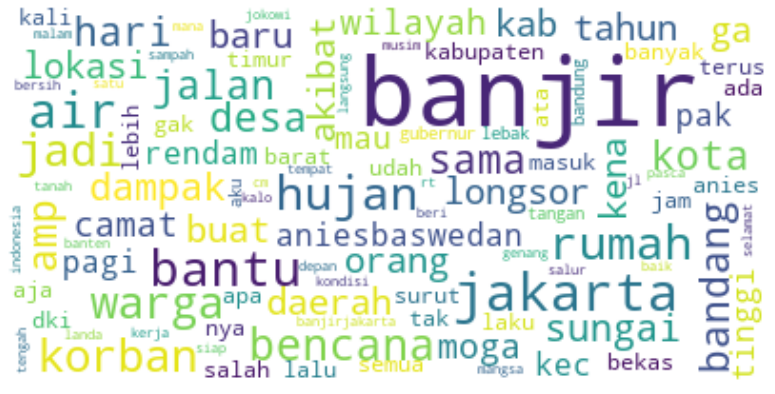

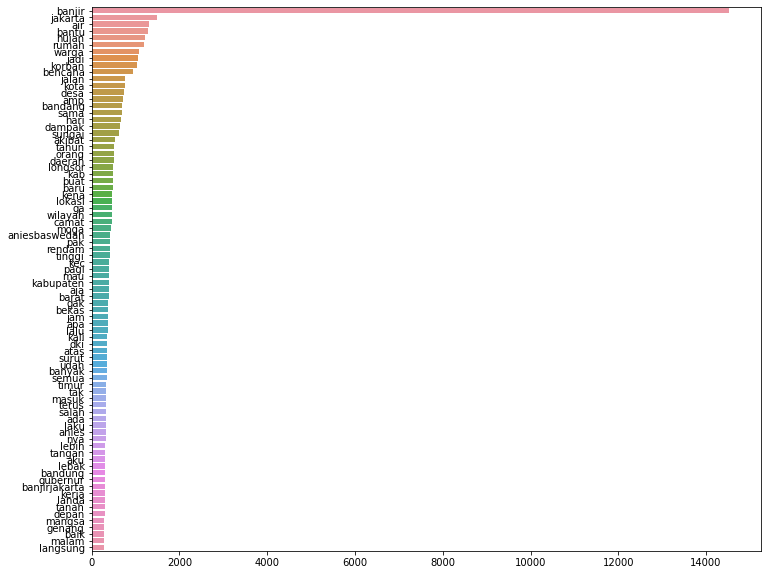

In [7]:
vocab = create_vocab(combined_df['text'], show_graph=True)

In [5]:
combined_df = pd.read_csv('dataset/processed_combined.csv')

In [6]:
train_df = combined_df[combined_df['label'].notnull()]
test_df = combined_df[combined_df['label'].isnull() & combined_df['media'].notnull()]
unlabeled_df = combined_df[combined_df['label'].isnull() & combined_df['media'].isnull()]

train_df.shape, test_df.shape, unlabeled_df.shape, combined_df.shape

((1518, 8), (1011, 8), (9936, 8), (12465, 8))

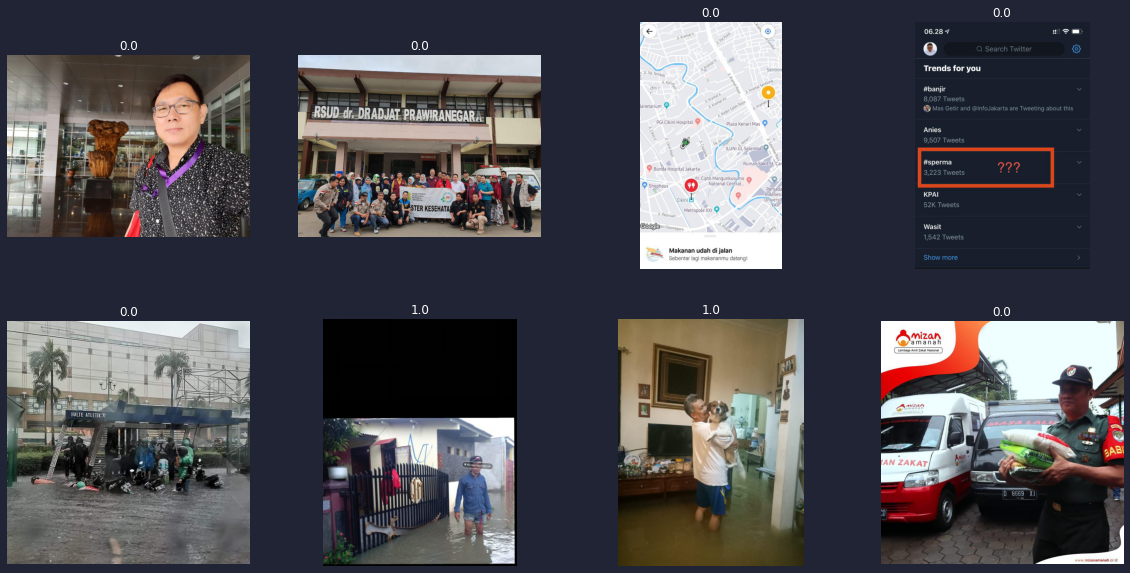

In [11]:
# preview image
fig = plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    img = plt.imread(f'dataset/media/Image/{train_df.media[i]}')
    plt.title(train_df.label[i])
    plt.imshow(img, cmap=plt.get_cmap("gray"))
    plt.axis("off")
plt.show()

# Unused

In [46]:
tfv = TfidfVectorizer(
    min_df=3,
    max_features=10000,
    strip_accents="unicode",
    analyzer="word",
    token_pattern=r"\w{1,}",
    ngram_range=(1, 3),
    use_idf=1,
    smooth_idf=1,
    sublinear_tf=1,
)

tfv.fit(train_df["text"])
X_text_train = tfv.transform(train_df["text"])
X_text_test = tfv.transform(test_df["text"])
X_text_unlabel = tfv.transform(unlabeled_df["text"])
print("X (tfidf):", X_text_train.shape)

svd = TruncatedSVD(n_components=200)
svd.fit(X_text_train)
X_text_train = svd.transform(X_text_train)
print("X (svd):", X_text_train.shape)

X_text_train = pd.DataFrame(
    X_text_train, columns=["svd_{}".format(i) for i in range(200)]
)

X_text_test = svd.transform(X_text_test)
X_text_test = pd.DataFrame(
    X_text_test, columns=["svd_{}".format(i) for i in range(200)]
)

X_text_unlabel = svd.transform(X_text_unlabel)
X_text_unlabel = pd.DataFrame(
    X_text_unlabel, columns=["svd_{}".format(i) for i in range(200)]
)

X_text_train.head()


X (tfidf): (1518, 2547)
X (svd): (1518, 200)


,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,...,svd_190,svd_191,svd_192,svd_193,svd_194,svd_195,svd_196,svd_197,svd_198,svd_199
0,0.139737,0.037498,0.009347,0.000281,-0.003858,-0.005243,-0.022200,0.000542,0.012966,0.035360,...,0.059509,-0.025703,0.008106,0.019782,0.044441,0.006872,-0.045395,0.081960,0.032521,-0.001254
1,0.073688,-0.050519,0.047383,-0.067333,-0.025410,0.017745,0.026324,-0.028071,0.003823,-0.001895,...,0.005331,0.008407,-0.037065,-0.004769,-0.001449,-0.044882,-0.025522,-0.070163,-0.078194,0.030984
2,0.135455,-0.120894,-0.046482,0.006003,-0.054043,0.007284,-0.067470,0.092591,-0.038736,0.016411,...,-0.017814,0.056407,-0.028384,-0.018328,-0.014591,-0.001135,-0.052413,0.001301,-0.033707,-0.022491
3,0.137853,-0.082532,-0.147687,0.199900,0.070515,0.177077,0.333915,0.082443,-0.021100,0.039530,...,-0.052096,-0.011345,0.017555,0.013868,0.020394,-0.042072,-0.058198,0.024801,-0.009290,0.015420
4,0.141860,-0.107105,-0.104596,0.027365,0.009505,-0.116645,0.039882,0.026702,-0.052459,-0.014035,...,0.008579,0.006400,-0.013422,-0.062033,-0.019625,-0.037333,0.010831,-0.028761,-0.014197,-0.034625


In [47]:
X_text_train.shape, X_text_test.shape, X_text_unlabel.shape

((1518, 200), (1011, 200), (9936, 200))